## __Clustering analysis on a Synthetic (Random) dataset__

#### __Import the necessary libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

#### __Generate a synthetic dataset__

In [2]:
# Generate sample data (students' scores in Math and Science)
np.random.seed(42)

math_scores = np.random.randint(50, 100, 50)
science_scores = np.random.randint(50, 100, 50)

# Combine into a dataset
student_scores = np.column_stack((math_scores, science_scores))

student_scores_df = pd.DataFrame(data=student_scores, columns=['Maths Score', 'Science Score'])
student_scores_df.head()

,Maths Score,Science Score
0,88,51
1,78,69
2,64,77
3,92,96
4,57,56


#### __Plotting the dataset__

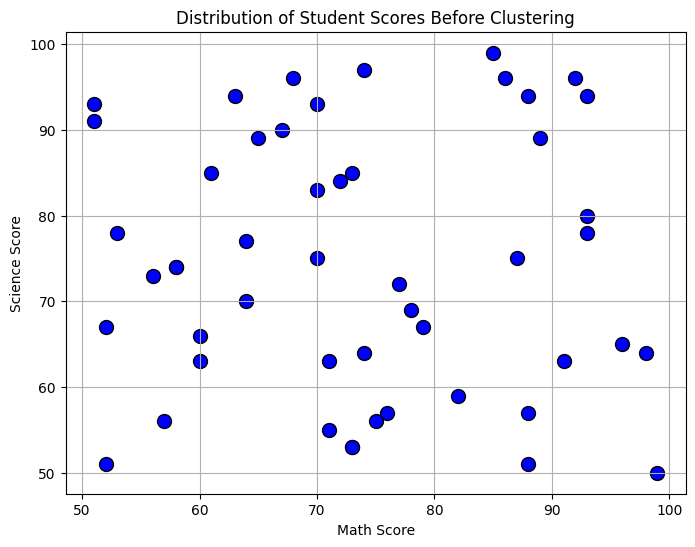

In [3]:
# Plot the distribution of points before clustering
plt.figure(figsize=(8, 6))
plt.scatter(math_scores, science_scores, color='blue', edgecolors='k', s=100)
plt.xlabel('Math Score')
plt.ylabel('Science Score')
plt.title('Distribution of Student Scores Before Clustering')
plt.grid(True)
plt.show()

### __K-Means clustering - Random Dataset__

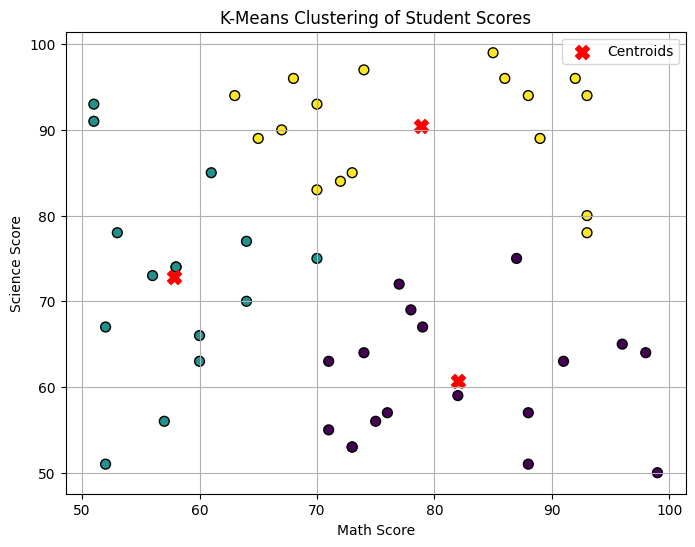

In [8]:
# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters = 3, random_state=42, n_init=10)
kmeans.fit(student_scores_df)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

student_scores_df['Cluster'] = clusters

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(student_scores_df['Maths Score'], student_scores_df['Science Score'], c=clusters, edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Math Score')
plt.ylabel('Science Score')
plt.title('K-Means Clustering of Student Scores')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
student_scores_df.head()

,Maths Score,Science Score,Cluster
0,88,51,0
1,78,69,0
2,64,77,1
3,92,96,2
4,57,56,1


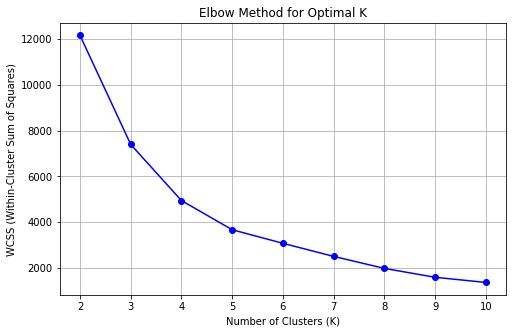

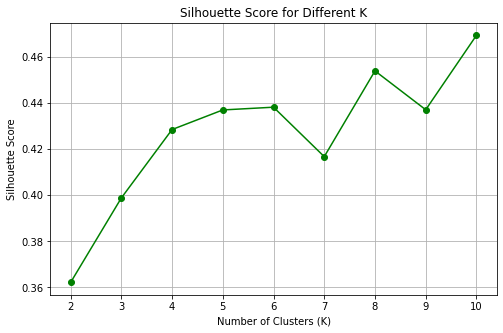

In [ ]:
from sklearn.metrics import silhouette_score

# Compute WCSS for different values of K (1 to 10)
wcss = []
silhouette_scores = []
K_range = range(2, 11)  # K must be at least 2 for silhouette score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(student_scores)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

    # Compute silhouette score
    sil_score = silhouette_score(student_scores, kmeans.labels_)
    silhouette_scores.append(sil_score)

# Plot Elbow Method (WCSS vs K)
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Plot Silhouette Score vs K
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.grid(True)
plt.show()


## How to Choose Between K=3 and K=8?
### Look at the Elbow Plot:

The "elbow point" suggests a strong drop in WCSS, meaning clusters are tight.
K=3 looks like a reasonable choice because after 3, the WCSS reduction slows down.

### Look at the Silhouette Score:

A higher score means clusters are more separated.
K=8 gives a higher score, meaning the clusters are more distinct, but it might be over-segmenting the data.

### Interpret the Context:

If we want fewer, broader clusters, K=3 is better (e.g., "Good, Average, Poor" students).
If we need more detailed groups, K=8 might work (e.g., grouping students into highly specific skill levels).

## Final Verdict

K=3 is more practical: The elbow method shows a natural cluster formation.
K=8 could be overfitting: It may split the data into too many unnecessary groups.

## Best Approach
Start with K=3 (since the elbow suggests it).
If deeper segmentation is needed, check K=8 with real-world interpretation.


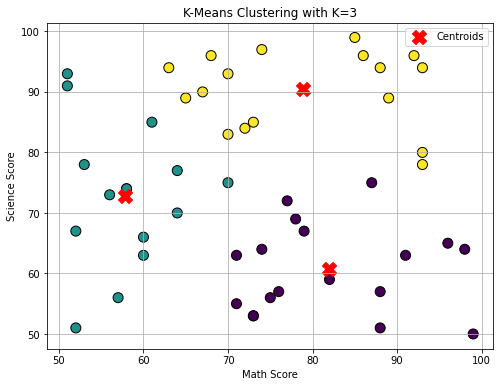

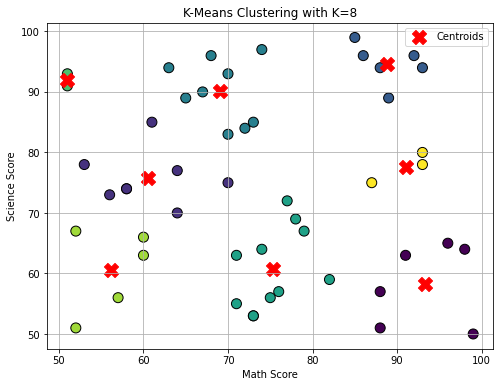

In [ ]:
def plot_kmeans_clusters(K, data, title):
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel('Math Score')
    plt.ylabel('Science Score')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot clusters for K=3
plot_kmeans_clusters(3, student_scores, 'K-Means Clustering with K=3')

# Plot clusters for K=8
plot_kmeans_clusters(8, student_scores, 'K-Means Clustering with K=8')


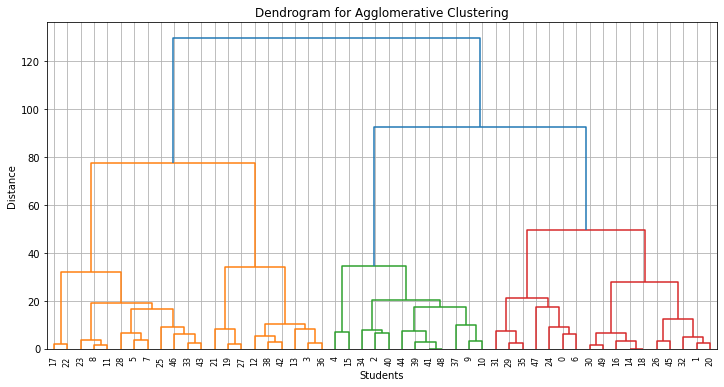

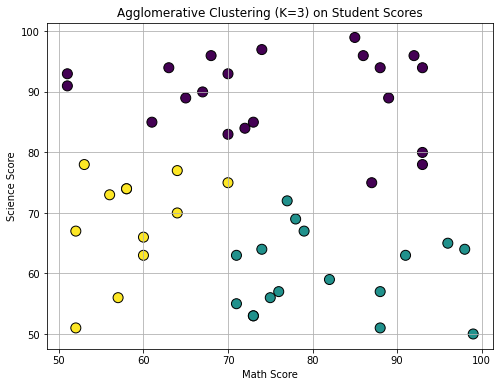

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Using 'ward' linkage (minimizes variance)
clusters_agglom = agglom.fit_predict(student_scores)

# Convert to DataFrame for visualization
df_agglom = pd.DataFrame(student_scores, columns=['Math Score', 'Science Score'])
df_agglom['Cluster'] = clusters_agglom


# Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(student_scores, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Students')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Plot the clusters found by Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(student_scores[:, 0], student_scores[:, 1], c=clusters_agglom, cmap='viridis', edgecolors='k', s=100)
plt.xlabel('Math Score')
plt.ylabel('Science Score')
plt.title('Agglomerative Clustering (K=3) on Student Scores')
plt.grid(True)
plt.show()


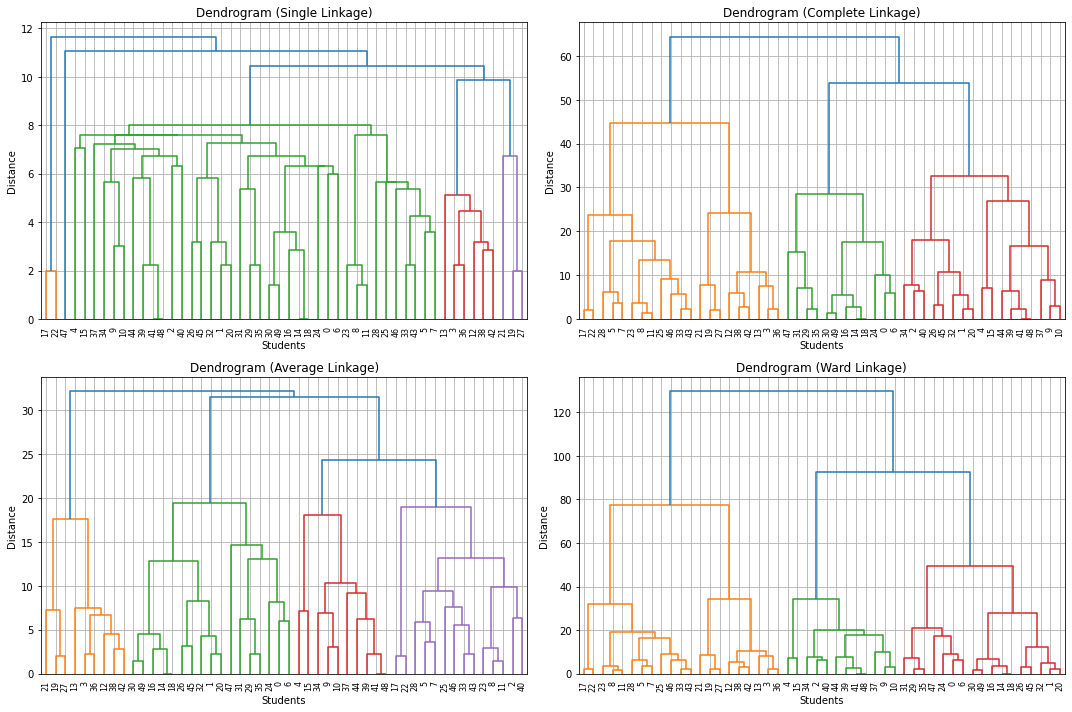

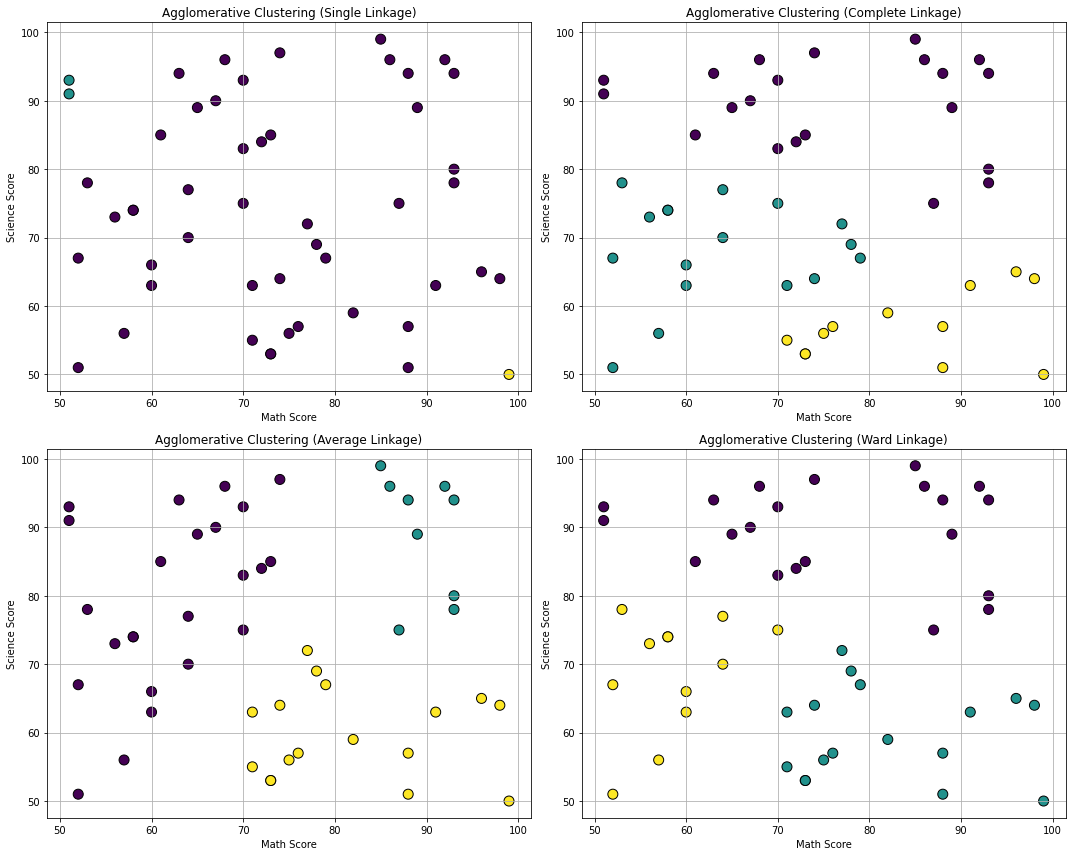

In [ ]:
# Different linkage methods to compare
linkage_methods = ['single', 'complete', 'average', 'ward']

# Plot dendrograms for each linkage method
plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    dendrogram = sch.dendrogram(sch.linkage(student_scores, method=method))
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Students')
    plt.ylabel('Distance')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Perform Agglomerative Clustering with each linkage method and plot results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for ax, method in zip(axes.flatten(), linkage_methods):
    agglom = AgglomerativeClustering(n_clusters=3, linkage=method)
    clusters = agglom.fit_predict(student_scores)

    ax.scatter(student_scores[:, 0], student_scores[:, 1], c=clusters, cmap='viridis', edgecolors='k', s=100)
    ax.set_xlabel('Math Score')
    ax.set_ylabel('Science Score')
    ax.set_title(f'Agglomerative Clustering ({method.capitalize()} Linkage)')
    ax.grid(True)

plt.tight_layout()
plt.show()


Estimated number of clusters: 2
Estimated number of noise points: 6


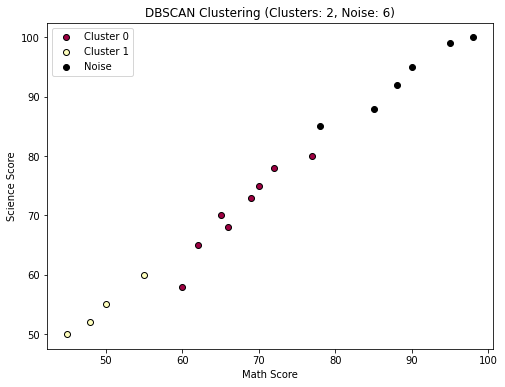

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Assuming student_scores is a NumPy array with Math Score and Science Score
student_scores = np.array([
    [78, 85], [90, 95], [88, 92], [55, 60], [60, 58], [62, 65],
    [95, 99], [45, 50], [85, 88], [70, 75], [72, 78], [98, 100],
    [50, 55], [65, 70], [66, 68], [77, 80], [48, 52], [69, 73]
])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(student_scores)


# Manually select `eps` based on the elbow point of the plot
optimal_eps = 0.5  # Adjust based on the graph
min_samples = 4    # Rule of thumb: min_samples = 2 * data dimensions

db = DBSCAN(eps=optimal_eps, min_samples=min_samples)
labels = db.fit_predict(scaled_data)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# 6️⃣ Plot Clustering Results
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise

    class_member_mask = (labels == k)
    xy = student_scores[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolors='k', label=f'Cluster {k}' if k != -1 else 'Noise')

plt.xlabel("Math Score")
plt.ylabel("Science Score")
plt.title(f"DBSCAN Clustering (Clusters: {n_clusters}, Noise: {n_noise})")
plt.legend()
plt.show()
